In [1]:
import pandas as pd  # Importing pandas library for data analysis
import numpy as np   # Importing numpy to work with data vectors
import torch        # Importing PyTorch as my framework for building deep learning models
import torch.nn as nn  # Importing nn, the package that defines neural network modules
import torch.nn.functional as F  # Importing functional from nn to use activation functions
import transformers   # Importing the Transformers library for natural language processing
import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization
import nltk          # Importing NLTK (Natural Language Toolkit) for text processing
from nltk.corpus import stopwords  # Importing stopwords from NLTK corpus to remove common words
import math             # Importing the math library for mathematical operations
import re                # Importing the re library for regular expressions
import contractions   # Importing the contractions library for handling contractions in text
from stemming.porter2 import stem  # Importing the Porter2 stemmer for word stemming
import torch.optim as optim   # Importing PyTorch's optimization library for training models
from torch.utils.data import DataLoader, TensorDataset  # Importing PyTorch utilities for data loading
from sklearn.model_selection import train_test_split  # Importing scikit-learn for data splitting

In [2]:
df = pd.read_csv('train.csv') # reading the data in the csv file and store it in variable df 
df.head() # display the first 5 rows

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
df.tail()  # display the last 5 rows 

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [5]:
df.nunique() #

id               159571
comment_text     159571
toxic                 2
severe_toxic          2
obscene               2
threat                2
insult                2
identity_hate         2
dtype: int64

In [6]:
class Text_Cleaner:
    def __init__(self):
        nltk.download('stopwords')
        self.stop_words = set(stopwords.words('english'))

    def clean_text(self, text):
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)   # Remove URLs 
                      
        text = re.sub(r'[^a-zA-Z\s]', '', text) # removing every character except the a-z , A-Z
                      
        text = re.sub(r'\d+', '', text)  # Remove digits 
                      
        text = text.lower() # convert to lowercase 
                      
        text = contractions.fix(text)   # Expand contractions using the contractions library

        words = text.split()    # Tokenize the text using your custom tokenizer

        cleaned_words = [word for word in words if word not in self.stop_words] # Remove stop words

        stemmed_words = [stem(word) for word in cleaned_words] # Apply Snowball Stemmer from the stemming library

        cleaned_text = ' '.join(stemmed_words)  # Join the cleaned and stemmed words back into a sentence

        return cleaned_text

clean = Text_Cleaner()

df['comments'] = df['comment_text'].apply(clean.clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ziadg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df['comments'].iloc[10] # display iloc[10] because it contains a large text data 

'fair use rational imagewonjujpg thank upload imagewonjujpg notic imag page specifi imag use fair use explan rational use wikipedia articl constitut fair use addit boilerpl fair use templat must also write imag descript page specif explan rational use imag articl consist fair use pleas go imag descript page edit includ fair use rational upload fair use media consid check specifi fair use rational page find list imag page edit click contribut link locat top wikipedia page log select imag dropdown box note fair use imag upload may lack explan delet one week upload describ criteria speedi delet question pleas ask media copyright question page thank talk contrib unspecifi sourc imagewonjujpg thank upload imagewonjujpg notic file descript page current specifi creat content copyright status unclear creat file need specifi owner copyright obtain websit link websit taken togeth restat websit term use content usual suffici inform howev copyright holder differ websit publish copyright also ackno

In [8]:
# dropping comment_text The 'axis' parameter is set to 1, indicating that we are removing a column, and the 'inplace' parameter is set to True, ensuring that the change is applied directly to the DataFrame.
df.drop(['comment_text'] , axis = 1 , inplace = True)  
df.columns

Index(['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate', 'comments'],
      dtype='object')

In [9]:
toxicity_columns = df.iloc[:, 1:7] # adding the index of each toxic label columns and store it in toxicity_columns 
toxicity_columns

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


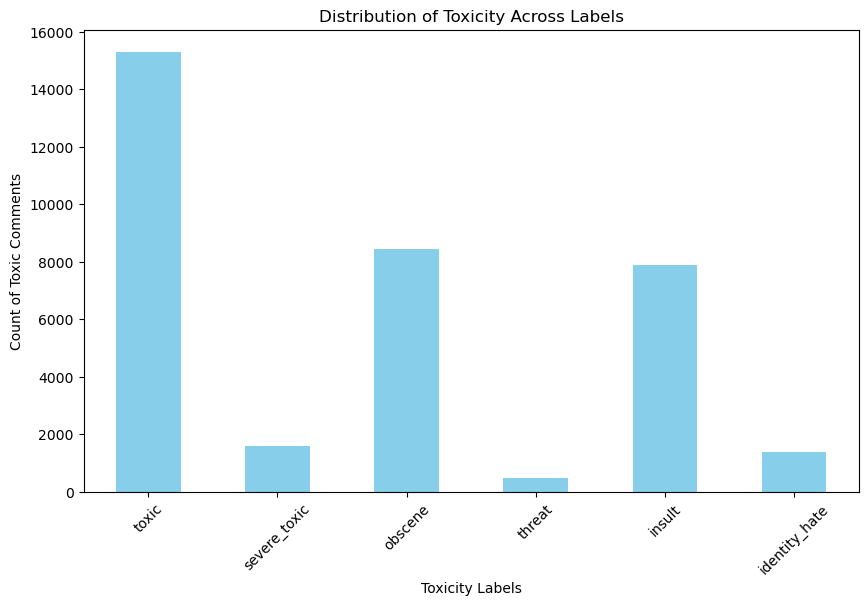

In [10]:
toxicity_counts = toxicity_columns.sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
toxicity_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Toxicity Labels')
plt.ylabel('Count of Toxic Comments')
plt.title('Distribution of Toxicity Across Labels')
plt.xticks(rotation=45)
plt.show()

In [11]:
df['clean_comments'] = (df.iloc[:, 1:7] == 0).all(axis=1) # defining clean column by making all the toxicity columns equal to zero and the comments which is not zero will be clean 
df['clean_comments']

0         True
1         True
2         True
3         True
4         True
          ... 
159566    True
159567    True
159568    True
159569    True
159570    True
Name: clean_comments, Length: 159571, dtype: bool

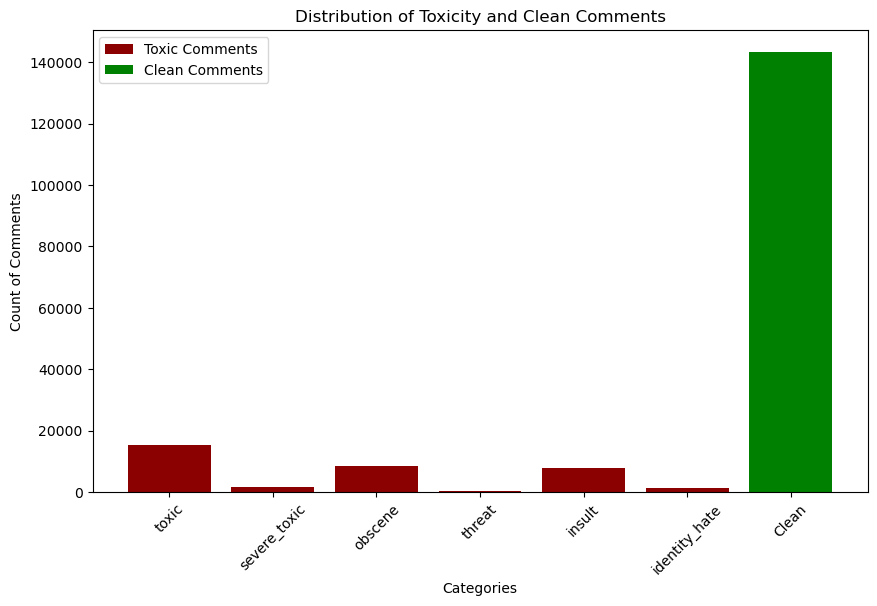

In [12]:
# Select the columns of toxicity you want to compare
toxcicity_columns = df.iloc[:, 1:7]

# Calculate the total count of toxic comments for each label
toxicity_counts = toxicity_columns.sum()
clean_counts = df['clean_comments'].sum()

plt.figure(figsize=(10, 6))
plt.bar(toxicity_counts.index, toxicity_counts, color='darkred', label='Toxic Comments')
plt.bar('Clean', clean_counts, color='green', label='Clean Comments')
plt.xlabel('Categories')
plt.ylabel('Count of Comments')
plt.title('Distribution of Toxicity and Clean Comments')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [13]:
def binary_value (value): 
    if (value == True) :
        return 1 
    else :
        return 0
    
df['clean_comments'] = df['clean_comments'].apply(binary_value)
df['clean_comments']

0         1
1         1
2         1
3         1
4         1
         ..
159566    1
159567    1
159568    1
159569    1
159570    1
Name: clean_comments, Length: 159571, dtype: int64

In [14]:
df.drop(['id'] , axis = 1 , inplace = True) # id column is Unnecessary we can search any comment by it's index 
df

,toxic,severe_toxic,obscene,threat,insult,identity_hate,comments,clean_comments
0,0,0,0,0,0,0,explan edit made usernam hardcor metallica fan...,1
1,0,0,0,0,0,0,daww match background colour seem stuck thank ...,1
2,0,0,0,0,0,0,hey man realli tri edit war guy constant remov...,1
3,0,0,0,0,0,0,cannot make real suggest improv wonder section...,1
4,0,0,0,0,0,0,sir hero chanc rememb page,1
...,...,...,...,...,...,...,...,...
159566,0,0,0,0,0,0,second time ask view complet contradict covera...,1
159567,0,0,0,0,0,0,asham horribl thing put talk page,1
159568,0,0,0,0,0,0,spitzer umm actual articl prostitut ring crunc...,1
159569,0,0,0,0,0,0,look like actual put speedi first version dele...,1


In [15]:
class multi_Head(nn.Module): # Define a multi-head attention module 
    def __init__(self, model_dim, num_heads): # Constructor to set up the module.
        super(multi_Head, self).__init__()
        self.num_heads = num_heads  # Number of attention heads
        self.model_dim = model_dim  # Size of the input data
        assert model_dim % self.num_heads == 0  # Make sure the size is divisible
        self.depth = model_dim // self.num_heads  # Size of each part 
        
        # implementing the neural network layers using PyTorch's nn.Linear
        self.wq = nn.Linear(model_dim, model_dim) # self.wq is a linear transformation for queries
        self.wk = nn.Linear(model_dim, model_dim) # self.wk is a linear transformation for keys
        self.wv = nn.Linear(model_dim, model_dim) # self.wv is a linear transformation for values

        self.dense = nn.Linear(model_dim, model_dim) # reshape the output of the multi head to match the desierd format using self.dense 
    
    def split_heads(self, x, batch_size):
        x = x.view(batch_size, -1, self.num_heads, self.depth) # Reshape the input into a 4D tensor (batch_size, num_heads, seq_len, depth)
        return x.permute(0, 2, 1, 3)  # Transpose dimensions to (batch_size, num_heads, seq_len, depth)

    def forward(self, query, key, value, mask=None):
        batch_size = query.size(0)  # Get the batch size from the query tensor
        
        # Split transformed queries, keys, and values into separate heads
        query = self.split_heads(self.wq(query), batch_size) # Transform queries using a linear layer 
        key = self.split_heads(self.wk(key), batch_size) # Transform keys using a linear layer
        value = self.split_heads(self.wv(value), batch_size) # Transform values using a linear layer

        qk = torch.matmul(query, key.permute(0, 1, 3, 2)) # Calculate the scaled dot-product attention scores (QK^T)
        dk = key.size(-1)  # Get the dimension of keys
        attention_logits = qk / np.sqrt(dk)  # Apply the scaling factor
        
        
        # add a large negative value to masked positions to ensure that the attention mechanism does not attend to padding tokens 
        if mask is not None:
            attention_logits += (mask * -1e9)  
            
        # applying softmax to the attention scores
        attention_weights = F.softmax(attention_logits, dim=-1) # calulating the attention weights 

        # calculating the weighted sum of values to get the output of the attention 
        output = torch.matmul(attention_weights, value)

        # Rearrange the output dimensions and concatenate heads
        output = output.permute(0, 2, 1, 3).contiguous().view(batch_size, -1, self.model_dim)

        # Apply a linear transformation to the concatenated outputs
        return self.dense(output)

In [16]:
class feed_forward(nn.Module): # Define Position-wise Feed-Forward Networks for each position in a sequence 
    def __init__(self, model_dim, dff):
        super(feed_forward, self).__init__()
        self.fc1 = nn.Linear(model_dim, dff) # First linear transformation fully connected layer 
        self.fc2 = nn.Linear(dff, model_dim) # seconed linear transformation (fully connected layer)

    def forward(self, x):
# Process the input 'x' through two transformations: fc1 and fc2,  with a ReLU activation in between, and return the result.
        return self.fc2(F.relu(self.fc1(x)))  

In [17]:
class pos_encoding(nn.Module): # Define a positional encoding module to add positional information to input sequences
    def __init__(self, model_dim, max_len=5000):
        super(pos_encoding, self).__init__()
        self.model_dim = model_dim # Initialize the model dimension
        self.max_len = max_len  # Initialize maximum sequence length
        self.pe = self.create_positional_encoding() # Create positional encodings using sine and cosine functions

    def create_positional_encoding(self):
        pe = torch.zeros(self.max_len, self.model_dim) # create a zero matrix to store postional encodeing 
        position = torch.arange(0, self.max_len, dtype=torch.float).unsqueeze(1) # Create a position tensor to represent sequence positions
        div_term = torch.exp(torch.arange(0, self.model_dim, 2).float() * (-np.log(10000.0) / self.model_dim)) # Calculate a divisor term based on the model dimension
        # calculate sine and cosine positional encodings and assign them to the matrix.
        pe[:, 0::2] = torch.sin(position * div_term) 
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1) # reshape and transpose the matrix 
        return pe


    def forward(self, x):
        return x + self.pe[:x.size(0), :] # Add the positional encoding to the input sequence 'x'

In [18]:
class encoder_layer(nn.Module): # Define an encoder layer module 
    def __init__(self, em_dim, num_heads, ff_dim, dropout_rate): 
        super(encoder_layer, self).__init__()
        self.multi_Head = multi_Head(em_dim, num_heads) # Multi-Head Self Attention
        self.feed_forward = feed_forward(em_dim, ff_dim) # Position-wise Feed Forward
# useing two Layer normalization after attention and pwff to stabilize and normalize also to ensuring stable training and consistent activations.
        self.layer_norm1 = nn.LayerNorm(em_dim)
        self.layer_norm2 = nn.LayerNorm(em_dim)
        self.dropout = nn.Dropout(dropout_rate) # Dropout for regularization

    def forward(self, x, mask):
        # Multi-Head Self Attention
        attention_output = self.multi_Head(x, x, x, mask)
        # apply dropout, residual connection, and layer normalization after attention
        x = self.dropout(self.layer_norm1(x + attention_output))

        # Position-wise Feed Forward
        ff_output = self.feed_forward(x)
        # apply dropout, residual connection, and layer normalization after feed-forward
        x = self.dropout(self.layer_norm2(x + ff_output))

        return x

In [19]:
class decoder_layer(nn.Module): # Define a decoder layer module
    def __init__(self, model_dim, num_heads, dff, dropout_rate=0.1):
        super(decoder_layer, self).__init__()
        self.mha1 = multi_Head(model_dim, num_heads) # Multi-Head Self Attention (Masked)
        self.mha2 = multi_Head(model_dim, num_heads) # Encoder-Decoder Attention
        self.ffn = feed_forward(model_dim, dff) #  Position-wise Feed Forward
        # Layer Normalization after each module
        self.layernorm1 = nn.LayerNorm(model_dim)
        self.layernorm2 = nn.LayerNorm(model_dim)
        self.layernorm3 = nn.LayerNorm(model_dim)
         # Dropout for regularization after each module
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.dropout3 = nn.Dropout(dropout_rate)

    def forward(self, x, en_output, head_mask, padding_mask):
        attn1 = self.mha1(x, x, x, head_mask)  # Multi-Head Self Attention (Masked)
        out1 = self.layernorm1(attn1 + x) # Encoder-Decoder Attention
        # Apply dropout, residual connection, and layer normalization after self-attention
        attn2 = self.mha2(out1, en_output, en_output, padding_mask)
        out2 = self.layernorm2(attn2 + out1) # Apply dropout, residual connection, and layer normalization
        ffn_output = self.ffn(out2) # Position-wise Feed Forward
        # Apply dropout, residual connection, and layer normalization after feed-forward
        return self.layernorm3(ffn_output + out2) 

In [66]:
class Transformer(nn.Module): 
    def __init__(self, num_layers, model_dim, num_heads, dff, input_size, dropout_rate=0.1):
        super(Transformer, self).__init__() 
        self.encoder_embedding = nn.Embedding(input_size, model_dim) 
        self.pos_encoding = pos_encoding(model_dim) 
        
        # Use ModuleList for en_layers
        self.en_layers = nn.ModuleList([encoder_layer(model_dim, num_heads, dff, dropout_rate) for _ in range(num_layers)])
        
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(model_dim, 7)

    def forward(self, inp):
        en_x = self.encoder_embedding(inp)
        en_x = self.pos_encoding(en_x)
        en_x = self.dropout(en_x)
        for en_layer in self.en_layers:
            en_x = en_layer(en_x, None)
            
        en_x = en_x.mean(dim=1)
        return torch.sigmoid(self.fc(en_x))

In [21]:
import torchtext  # Import torchtext for natural language processing
from torch.nn.utils.rnn import pad_sequence  # Import pad_sequence for padding sequences
# Get comments from a DataFrame and convert them to a list
comments = df['comments'].tolist()
# Tokenize the comments using NLTK (Natural Language Toolkit)
nltk.download("punkt")  # Download NLTK data if not already downloaded
from nltk.tokenize import word_tokenize  # Import the word_tokenize function from NLTK
tokenized_comments = []
# Tokenize each comment
for comment in comments:
    tokens = word_tokenize(comment)
    tokenized_comments.append(tokens)

# Build a vocabulary based on the tokenized comments using torchtext
voc = torchtext.vocab.build_vocab_from_iterator(tokenized_comments,
    specials=["<unk>", "<pad>"],  # Define special tokens for unknown and padding
    min_freq=1)  # Set the minimum frequency for a token to be included in the vocabulary
# Convert tokenized comments to numerical IDs
numerical_comments = []
max_sequence_length = 12  # Set the desired sequence length
# Convert tokens to numerical IDs and pad sequences to the desired length
for tokens in tokenized_comments:
    if len(tokens) >= max_sequence_length:
        numerical_comment = [voc[token] for token in tokens[:max_sequence_length]]
    else:
        numerical_comment = [voc[token] for token in tokens] + [voc["<pad>"]] * (max_sequence_length - len(tokens))
    
    numerical_comments.append(numerical_comment)
# Pad sequences to a fixed length using torch's pad_sequence
padded_comments = pad_sequence([torch.LongTensor(comment) for comment in numerical_comments], batch_first=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ziadg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
# Define hyperparameters
num_layers = 2
model_dim = 128
num_heads = 4
dff = 512
input_size = len(voc)
dropout_rate = 0.1

In [23]:
model = Transformer(num_layers, model_dim, num_heads, dff, input_size, dropout_rate) # model creation 

In [24]:
# adding all the toxicity and non toxicity columns as my labeled data
toxicity_levels = df[['toxic', 'severe_toxic','obscene', 'threat', 'insult', 'identity_hate','clean_comments']].values.astype(float)

In [25]:
numerical_sequences = numerical_comments  # assign the numericalized comments to numerical_sequences
labels = toxicity_levels  # assign the toxicity level as my labels

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(numerical_sequences, labels, test_size=0.35, random_state=30)

In [27]:
# Convert data to PyTorch tensors
X_train_tensor = torch.LongTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.LongTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)
X_train_tensor.shape , y_train_tensor.shape

(torch.Size([103721, 12]), torch.Size([103721, 7]))

In [28]:
# Reshape X_train_tensor to (batch_size, sequence_length) format
X_train_tensor = X_train_tensor.view(-1, 12)  # Assuming sequence_length is 12
X_train_tensor.shape , y_train_tensor.shape

(torch.Size([103721, 12]), torch.Size([103721, 7]))

In [29]:
# Create data loaders
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size) 

In [30]:
# Training hyperparameters 
lr = 0.01
epochs = 10

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=lr) 

In [31]:
# Training Loop
for epoch in range(epochs):  # Loop through the specified number of training epochs
    model.train()  # Set the model to training mode
    total_loss = 0  # Initialize the total loss for this epoch
    # Iterate through batches in the training data loader
    for batch in train_loader:
        comments, batch_labels = batch  # Get comments and batch labels
        outputs = model(comments)  # Forward pass to get model predictions
        loss = criterion(outputs, batch_labels)  # Calculate the loss
        optimizer.zero_grad()  # Reset gradients
        loss.backward()  # Backpropagation to compute gradients
        optimizer.step()  # Update model parameters using the optimizer
        total_loss += loss.item()  # sum  the batch loss
    # Print training progress for this epoch
    print(f"Epoch:[{epoch + 1}/{epochs}], Loss: {total_loss / len(train_loader):.4f}")

Epoch:[1/10], Loss: 0.6478
Epoch:[2/10], Loss: 0.6428
Epoch:[3/10], Loss: 0.6416
Epoch:[4/10], Loss: 0.6408
Epoch:[5/10], Loss: 0.6403
Epoch:[6/10], Loss: 0.6399
Epoch:[7/10], Loss: 0.6396
Epoch:[8/10], Loss: 0.6393
Epoch:[9/10], Loss: 0.6391
Epoch:[10/10], Loss: 0.6390


In [32]:
# Import necessary metrics from scikit-learn
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
# Set the model to evaluation mode
model.eval()
# Disable gradient computation for evaluation
with torch.no_grad():
    correct = 0  # Initialize the count of correct predictions
    total = 0    # Initialize the total count of predictions
    all_predicted = []  # List to store all predicted labels
    all_labels = []     # List to store all true labels
    
    # Iterate through batches in the test data loader
    for inputs, labels in test_loader:
        outputs = model(inputs)  # Forward pass to get model predictions
        predicted = torch.round(torch.sigmoid(outputs))  # Round predictions to 0 or 1
        predicted_flat = predicted.view(-1)  # Reshape to a 1D vector
        labels_flat = labels.view(-1)        # Reshape to a 1D vector
        # Calculate accuracy for this batch
        batch_correct = (predicted_flat == labels_flat).sum().item()
        batch_total = labels_flat.size(0)
        correct += batch_correct
        total += batch_total
        # add batch predictions and labels to the lists
        all_predicted.extend(predicted_flat.cpu().numpy())
        all_labels.extend(labels_flat.cpu().numpy())
    # Calculate and print test accuracy
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
# Calculate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predicted)
# Calculate precision, recall, and F1-score
precision = precision_score(all_labels, all_predicted)
recall = recall_score(all_labels, all_predicted)
f1 = f1_score(all_labels, all_predicted)
# Print confusion matrix and evaluation metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Test Accuracy: 97.36%
Confusion Matrix:
[[322442   5836]
 [  4501  58171]]
Precision: 0.91
Recall: 0.93
F1-score: 0.92


In [45]:
def classify_comment(input_text, model, voc, max_sequence_length=12, threshold=0.5):
    # Clean the input text using a text cleaner 
    cleaned_text = clean.clean_text(input_text)
    # Tokenize the cleaned text
    tokens = word_tokenize(cleaned_text)
    # Convert tokens to numerical IDs using the vocabulary (voc)
    numerical_comment = [voc[token] for token in tokens]
    # Pad the numerical comment to the desired sequence length
    if len(numerical_comment) >= max_sequence_length:
        numerical_comment = numerical_comment[:max_sequence_length]
    else:
        numerical_comment += [voc["<pad>"]] * (max_sequence_length - len(numerical_comment))
    # Create an input tensor from the numerical comment
    input_tensor = torch.LongTensor(numerical_comment).view(1, -1)  
    # Set the model to evaluation mode
    model.eval()  
    # Disable gradient computation during inference
    with torch.no_grad():
        output = model(input_tensor)
    # Define labels for toxicity levels
    labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'clean_comments']
    # Create a dictionary to store the classifications
    classifications = {}
    # Iterate through the labels and their corresponding probabilities
    for label, prob in zip(labels, output[0]):
        # Classify the label as 1 (toxic) if the probability is above the threshold, else 0 (not toxic)
        classifications[label] = 1 if prob >= threshold else 0
    return classifications
# Example input text
input_text = "suck loser go kill urself lol bloodi cow retard"
# Classify the comment using the provided function
classifications = classify_comment(input_text, model, voc)
# Print the classifications for all toxicity levels
for label, classification in classifications.items():
    print(f"{label}: {classification}")

toxic: 1
severe_toxic: 1
obscene: 1
threat: 0
insult: 1
identity_hate: 0
clean_comments: 0
